In [1]:
import networkx as nx
import pandas as pd
import stellargraph as sg
import graphnets
from graphnets import gcn_pipeline, graphsage_pipeline

In [2]:
network = pd.read_csv('data/bio-pathways-network.csv')
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [3]:
multi_diseases = pd.read_csv('data/simple-all-proteins.csv', index_col=0)
binary_diseases = pd.read_csv('data/binary-classes.csv', index_col=0)
multi_only_diseases = pd.read_csv('data/simple-diseased-proteins.csv', index_col=0)

In [4]:
motifs = pd.read_csv('data/bio-pathways-proteinmotifs.csv', index_col=0)

In [5]:
nodes = set(graph.nodes())
drop_rows = []
for n in multi_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
node_multi_diseases = multi_diseases.drop(drop_rows)

In [6]:
dis_graph = nx.read_gml('networks/diseased-ppi')
dis_graph = nx.relabel_nodes(dis_graph, lambda x: int(x), copy=False)
nodes = set(dis_graph.nodes())
drop_rows = []
for n in multi_only_diseases.index:
    if n not in nodes:
        drop_rows.append(n)
dis_nodes_multi = multi_only_diseases.drop(drop_rows)

In [7]:
all_motifs_multi_only_diseases = dis_nodes_multi.join(motifs)
all_motifs_multi_diseases = node_multi_diseases.join(motifs)

**Original**

Full Network

In [8]:
G = sg.StellarGraph(graph, node_features=node_multi_diseases)

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  """Entry point for launching an IPython kernel.


Array shapes:
 train = (4311, 10)
 val = (8623, 10)
 test = (8623, 10)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 294ms/step - loss: 0.5268 - acc: 0.1072 - f1_m: 0.2186 - precision_m: 0.5649 - recall_m: 0.1355

Test Set Metrics:

loss: 0.5268

acc: 0.1072

f1_m: 0.2186

precision_m: 0.5649

recall_m: 0.1355


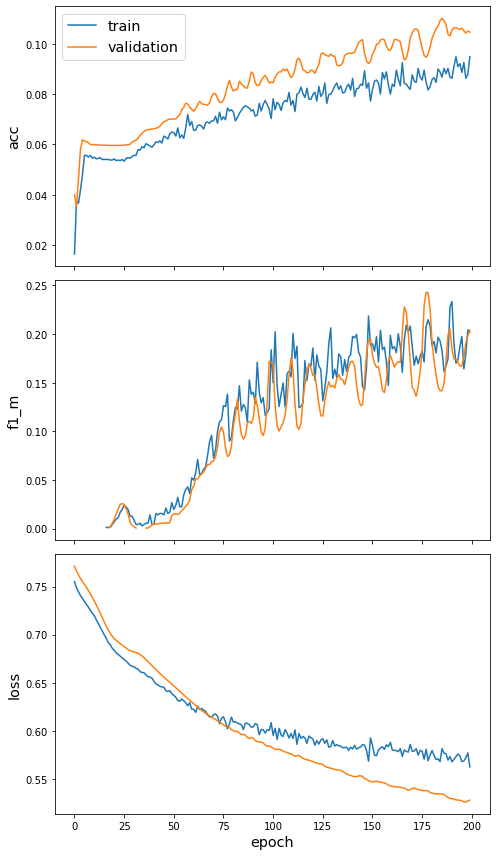

In [9]:
gcn_pipeline(G, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 10)
 val = (8623, 10)
 test = (8623, 10)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


173/173 [==============================] - ETA: 10s - loss: 0.4979 - acc: 0.0400 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+ - ETA: 7s - loss: 0.4413 - acc: 0.0467 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00 - ETA: 7s - loss: 0.6752 - acc: 0.0480 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5832 - acc: 0.0514 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5925 - acc: 0.0556 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5608 - acc: 0.0564 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.6854 - acc: 0.0538 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.7218 - acc: 0.0547 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.7003 - acc: 0.0565 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.7118 - acc: 0.0558 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.7039 - acc: 0.0514

f1_m: nan

precision_m: nan

recall_m: 0.0000


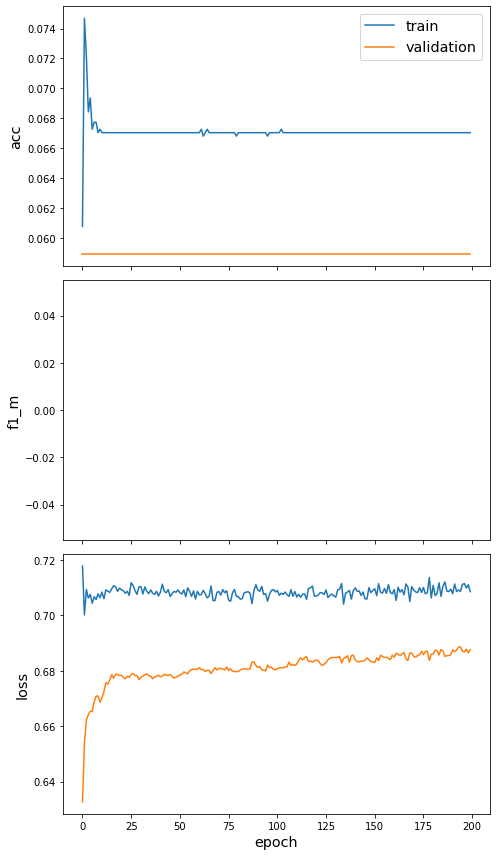

In [10]:
graphsage_pipeline(G, node_multi_diseases)

Diseased Network

In [11]:
dG = sg.StellarGraph(dis_graph, node_features=dis_nodes_multi)

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  """Entry point for launching an IPython kernel.


Array shapes:
 train = (1005, 10)
 val = (2012, 10)
 test = (2012, 10)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 69ms/step - loss: 2.2010 - acc: 0.3892 - f1_m: 0.2248 - precision_m: 0.8421 - recall_m: 0.1297

Test Set Metrics:

loss: 2.2010

acc: 0.3892

f1_m: 0.2248

precision_m: 0.8421

recall_m: 0.1297


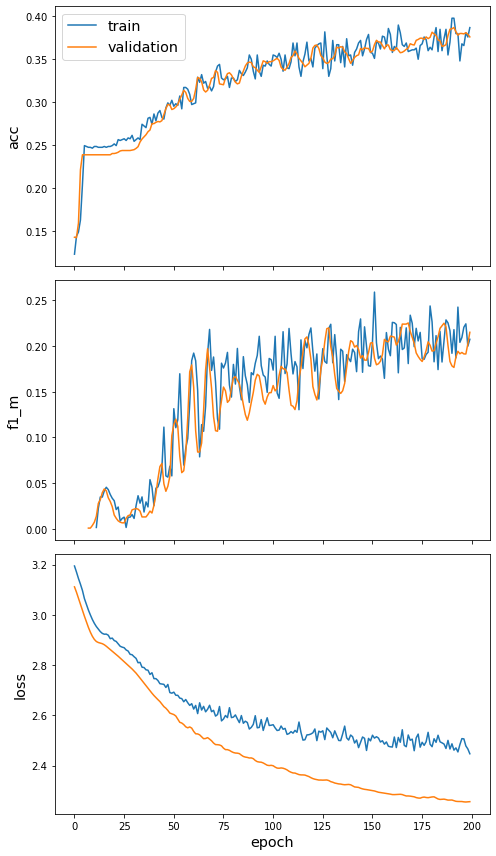

In [12]:
gcn_pipeline(dG, dis_nodes_multi, layer_sizes=[32,32])

Array shapes:
 train = (1005, 10)
 val = (2012, 10)
 test = (2012, 10)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 2.1830 - acc: 0.3400 - f1_m: 0.2687 - precision_m: 1.0000 - recall_m: 0.155 - ETA: 1s - loss: 2.5703 - acc: 0.3533 - f1_m: 0.2799 - precision_m: 1.0000 - recall_m: 0.165 - ETA: 1s - loss: 2.2191 - acc: 0.3960 - f1_m: 0.3387 - precision_m: 1.0000 - recall_m: 0.207 - ETA: 1s - loss: 2.1496 - acc: 0.3857 - f1_m: 0.3402 - precision_m: 1.0000 - recall_m: 0.209 - ETA: 0s - loss: 2.2004 - acc: 0.3978 - f1_m: 0.3370 - precision_m: 1.0000 - recall_m: 0.206 - ETA: 0s - loss: 2.2152 - acc: 0.3909 - f1_m: 0.3295 - precision_m: 1.0000 - recall_m: 0.200 - ETA: 0s - loss: 2.1916 - acc: 0.4000 - f1_m: 0.3280 - precision_m: 1.0000 - recall_m: 0.199 - ETA: 0s - loss: 2.1940 - acc: 0.4027 - f1_m: 0.3291 - precision_m: 1.0000 - recall_m: 0.199 - ETA: 0s - loss: 2.2283 - acc: 0.3988 - f1_m: 0.32

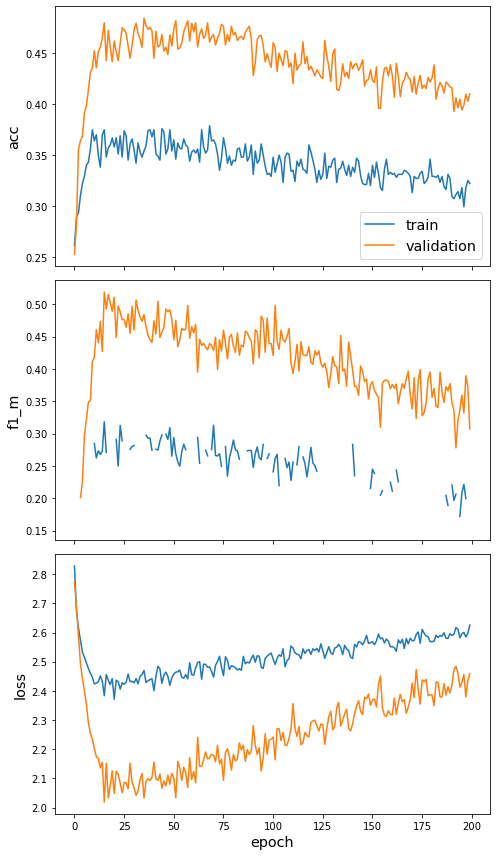

In [13]:
graphsage_pipeline(dG, dis_nodes_multi)

**All motifs**

Full Network

In [14]:
G_motif_exact = sg.StellarGraph(graph, node_features=all_motifs_multi_diseases)
G_motif_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  """Entry point for launching an IPython kernel.


'StellarGraph: Undirected multigraph\n Nodes: 21557, Edges: 342353\n\n Node types:\n  default: [21557]\n    Features: float32 vector, length 83\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [342353]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (4311, 10)
 val = (8623, 10)
 test = (8623, 10)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 167ms/step - loss: 4.6662 - acc: 0.0260 - f1_m: 0.0678 - precision_m: 0.0453 - recall_m: 0.1351

Test Set Metrics:

loss: 4.6662

acc: 0.0260

f1_m: 0.0678

precision_m: 0.0453

recall_m: 0.1351


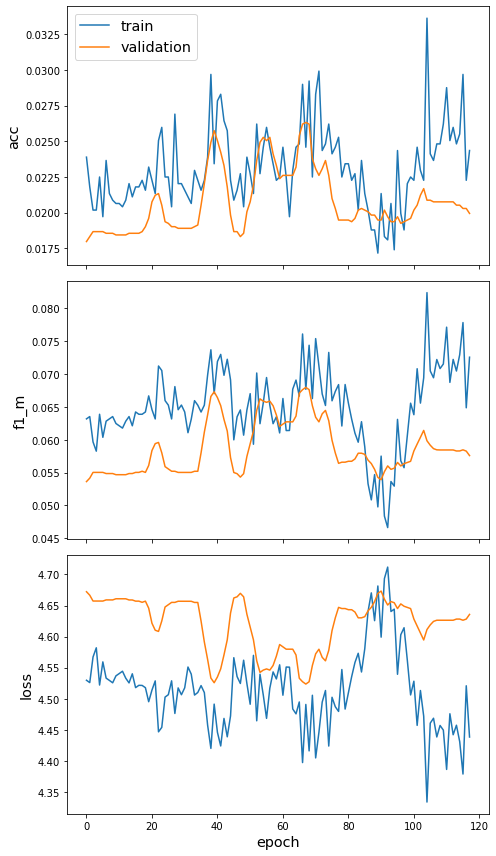

In [15]:
gcn_pipeline(G_motif_exact, node_multi_diseases, layer_sizes=[32, 32])

Array shapes:
 train = (4311, 10)
 val = (8623, 10)
 test = (8623, 10)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


172/173 [============================>.] - ETA: 8s - loss: 0.5875 - acc: 0.0600 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 7s - loss: 0.5089 - acc: 0.0400 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5533 - acc: 0.0440 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5598 - acc: 0.0371 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 6s - loss: 0.5430 - acc: 0.0422 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.5071 - acc: 0.0455 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.5706 - acc: 0.0492 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.5692 - acc: 0.0467 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.6055 - acc: 0.0506 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.6305 - acc: 0.0505 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 5s - loss: 0.6091 - acc: 0.0524 

173/173 [==============================] - 6s 34ms/step - loss: 0.6685 - acc: 0.0557 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+00

Test Set Metrics:

loss: 0.6685

acc: 0.0557

f1_m: nan

precision_m: nan

recall_m: 0.0000


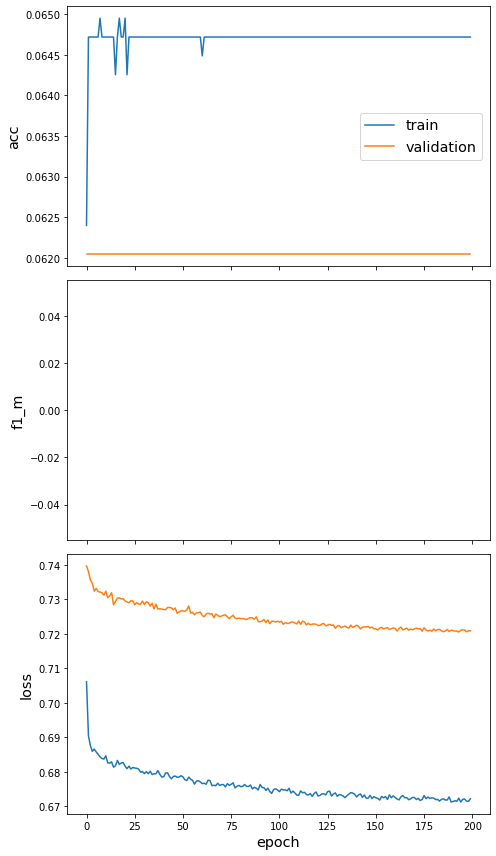

In [16]:
graphsage_pipeline(G_motif_exact, node_multi_diseases)

Diseased Network

In [17]:
dG_motif_exact = sg.StellarGraph(dis_graph, node_features=all_motifs_multi_only_diseases)
dG_motif_exact.info()

C:\Users\thu71\.conda\envs\Thomas\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Constructing a StellarGraph directly from a NetworkX graph has been replaced by the `StellarGraph.from_networkx` function
  """Entry point for launching an IPython kernel.


'StellarGraph: Undirected multigraph\n Nodes: 5029, Edges: 65674\n\n Node types:\n  default: [5029]\n    Features: float32 vector, length 83\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [65674]\n        Weights: all 1 (default)\n        Features: none'

Array shapes:
 train = (1005, 10)
 val = (2012, 10)
 test = (2012, 10)
Using GCN (local pooling) filters...
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
1/1 [==============================] - 0s 47ms/step - loss: 15.5603 - acc: 0.2560 - f1_m: 0.3445 - precision_m: 0.4090 - recall_m: 0.2975

Test Set Metrics:

loss: 15.5603

acc: 0.2560

f1_m: 0.3445

precision_m: 0.4090

recall_m: 0.2975


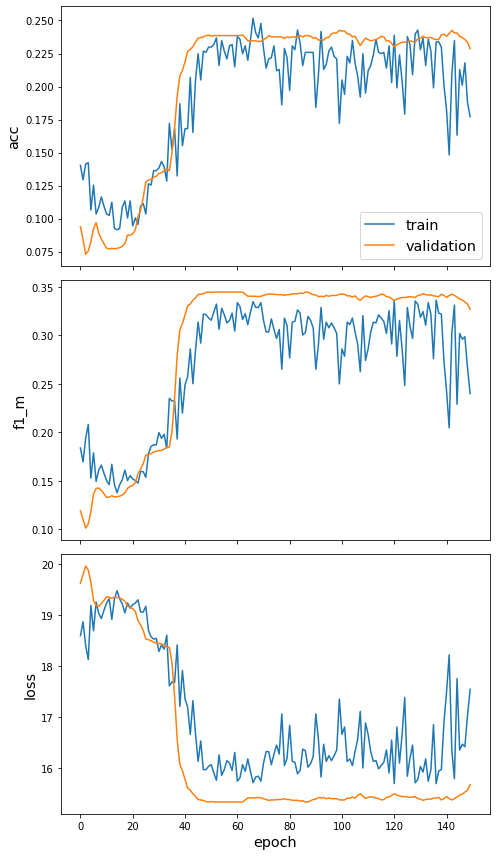

In [18]:
gcn_pipeline(dG_motif_exact, dis_nodes_multi, layer_sizes=[32, 32])

Array shapes:
 train = (1005, 10)
 val = (2012, 10)
 test = (2012, 10)
Training...
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
41/41 [==============================] - ETA: 1s - loss: 2.9217 - acc: 0.3000 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 2.8082 - acc: 0.2733 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 2.9295 - acc: 0.2560 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 3.0700 - acc: 0.2486 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 3.0111 - acc: 0.2444 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 3.0415 - acc: 0.2480 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 2.9995 - acc: 0.2550 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 1s - loss: 3.0113 - acc: 0.2414 - f1_m: nan - precision_m: nan - recall_m: 0.0000e+0 - ETA: 0s - loss: 2.9842 - acc: 0.2425 - f1_m: nan - precision_m: n

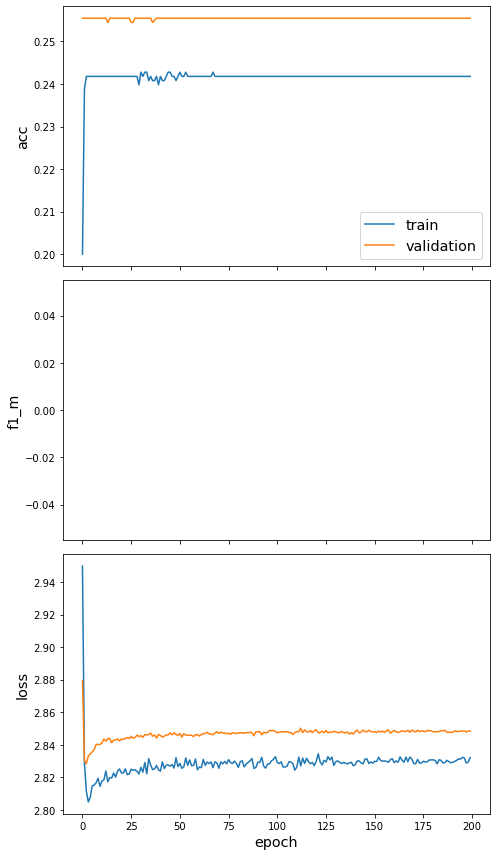

In [19]:
graphsage_pipeline(dG_motif_exact, dis_nodes_multi)